In [1]:
# import required libraries

import math
import numpy as np
import pandas as pd
import random

from collections import Counter
from matplotlib import colors, pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs 

%matplotlib inline

In [2]:
#useful links
#circles https://www.delftstack.com/howto/matplotlib/how-to-plot-a-circle-in-matplotlib/#:~:text=Circle()%20Method%20to%20Plot%20a%20Circle%20in%20Matplotlib,-Syntax%3A&text=Where%2C%20(x%2C%20y),is%20a%20subclass%20of%20Artist%20.&text=To%20plot%20a%20circle%20without,fill%20parameter%20to%20be%20False%20.

In [3]:
#parameters for the algorithm

random_state = 0
n_clusters = 4
user_elements = 800
figsize = (10,6)
cluster_std = 0.6
n_features = 2
n_init = 10
cluster_center_color = 'red'


In [4]:
#this function calculates changes in network usage and returns latest centroids for users

def get_centroids(cluster_std=0.6):
    
    #make user elements data points using the make_blob function
    #on real network, this is replaced by KPI permances on each of the TAs(Timimg Advance)
    X, y = make_blobs(n_samples=user_elements, 
                      centers=n_clusters, 
                      cluster_std=cluster_std, 
                      n_features=n_features,  
                      random_state=random_state)
    
    #plt instance to deal with plots
    plt.figure(figsize=figsize)
    plt.scatter(X[:,0], X[:,1])

    #create an instance of KMeans algorithm, un unsupervised ml to find groups in unlabeled datasets
    kmeans = KMeans(n_clusters=n_clusters, 
                    init='k-means++', 
                    max_iter=user_elements, 
                    n_init=n_init, 
                    random_state=random_state)
    
    #fit performs clustering on the input values, the X, returns the cluster labels
    #predict the closest cluster on which each of the data points, thats the input X values
    pred_y = kmeans.fit_predict(X)
    
    #plt instance to deal with plots
    plt.figure(figsize=figsize)  
    plt.scatter(X[:,0], X[:,1])
    plt.scatter(kmeans.cluster_centers_[:, 0], 
                kmeans.cluster_centers_[:, 1], 
                s=user_elements, 
                c=cluster_center_color)
    plt.show()
    
    #plot the UEs with hexagonal grids
    np.random.seed(random_state)
    n = user_elements
    x = np.random.standard_normal(n)
    y = 2.0 + 1.5 * x + 1.5 * np.random.standard_normal(n)

    fig, ax = plt.subplots(figsize=figsize)
    plt.xlim([-4, 4])
    plt.ylim([0, 10]) 
    
    #create the hexagonal bins for illustrating a cellular network
    hb = ax.hexbin(x, y, gridsize=4, bins='log', ec='white', lw=1.0)
    
    plt.scatter(X[:,0], X[:,1])
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=user_elements, c='red')    
    plt.show()

    #get the centroids after clustering
    centroids = kmeans.cluster_centers_
    centroids
    
    return centroids

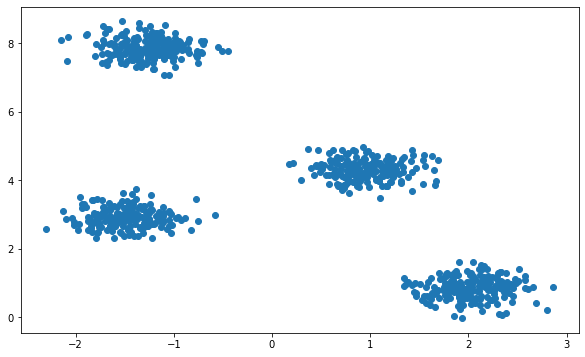

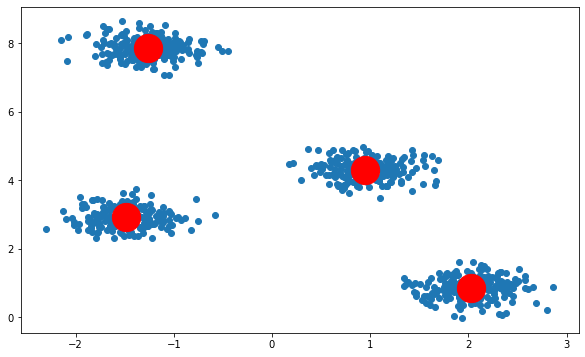

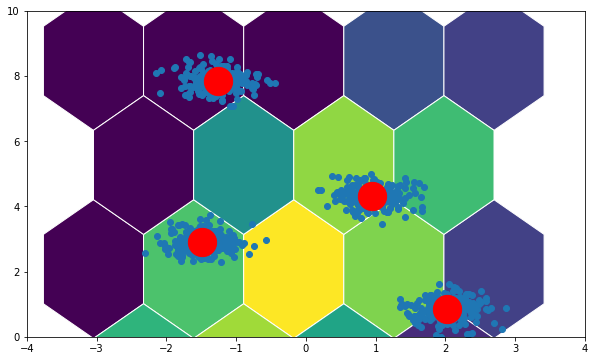

[[ 2.02839763  0.86047316]
 [-1.26452478  7.85588095]
 [-1.48718967  2.91751448]
 [ 0.94514501  4.30547511]]


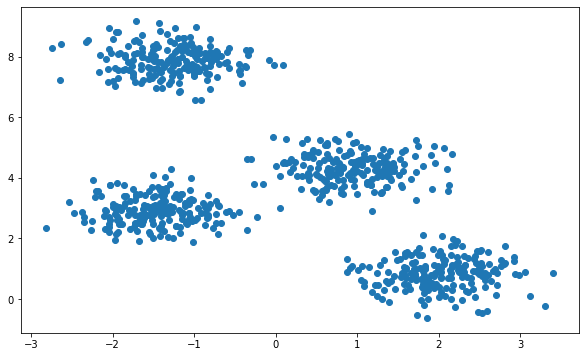

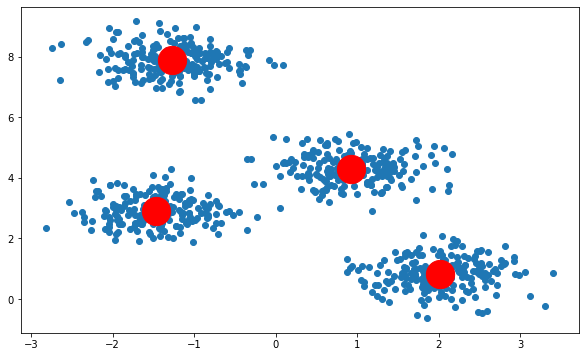

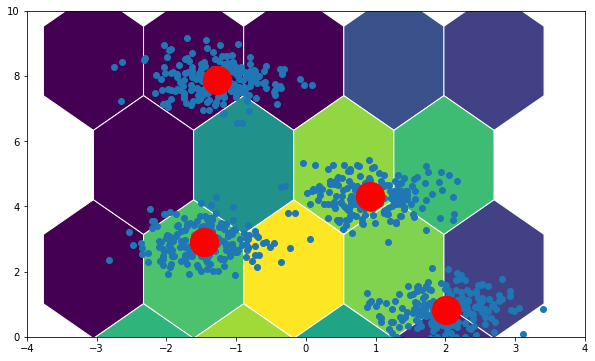

[[ 2.01048436  0.83567949]
 [-1.27537078  7.86949491]
 [ 0.91848394  4.30409405]
 [-1.46672848  2.91281918]]


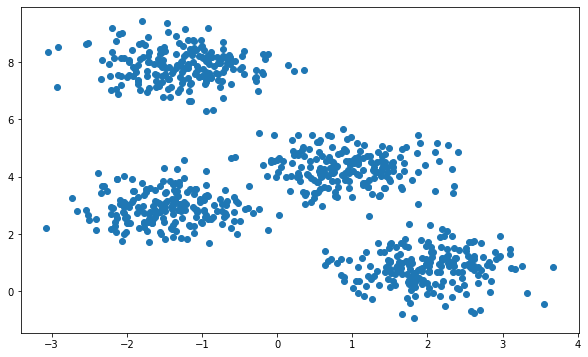

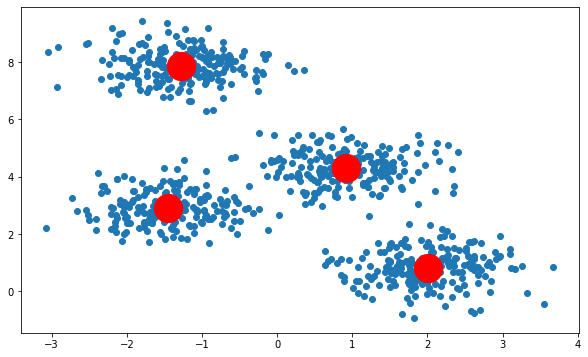

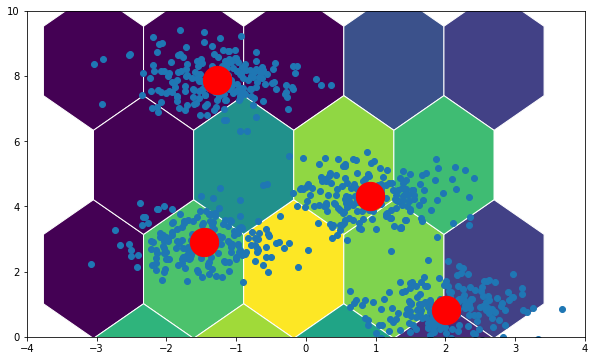

[[ 2.00152773  0.82328265]
 [-1.28079378  7.87630189]
 [ 0.91316245  4.30225728]
 [-1.45847603  2.91511662]]


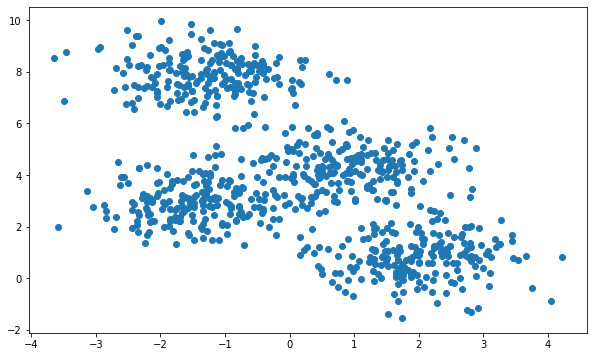

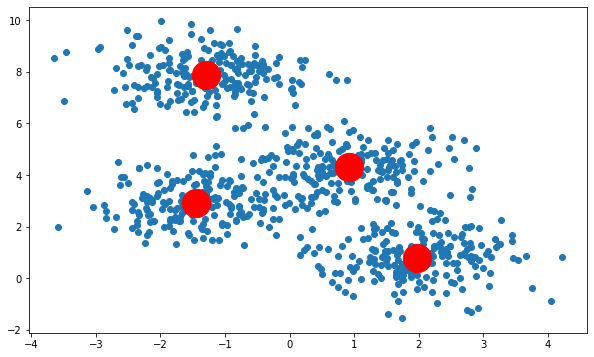

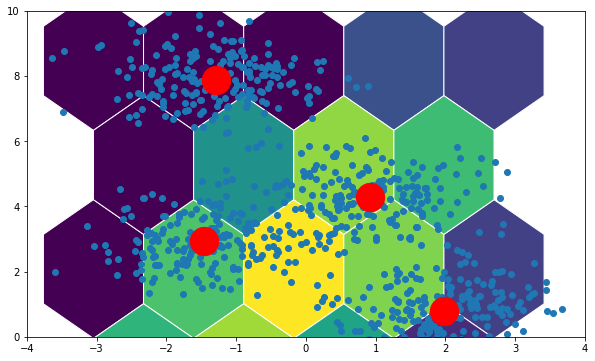

[[-1.28843898  7.8802913 ]
 [ 1.97443286  0.79948247]
 [-1.45727017  2.92495399]
 [ 0.9175191   4.29471735]]


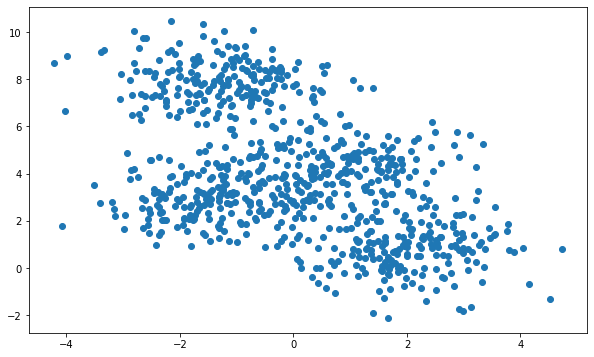

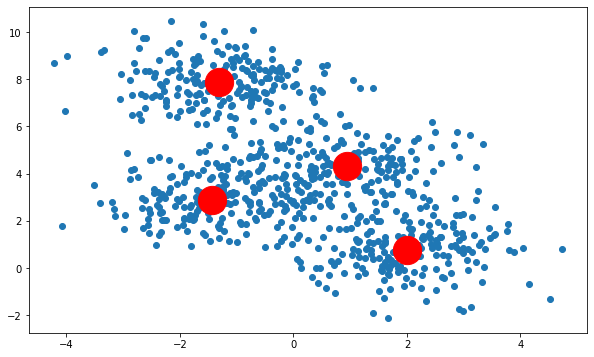

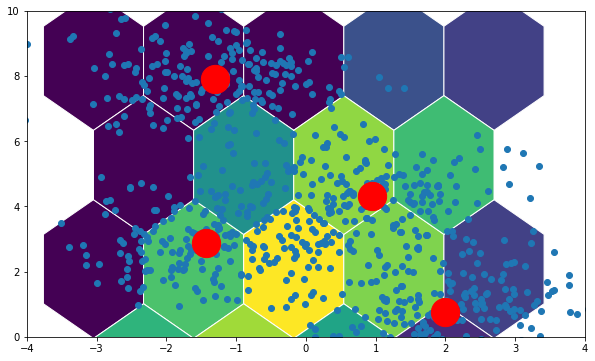

[[ 1.99981555  0.74689863]
 [ 0.94555171  4.32116292]
 [-1.30566067  7.90025483]
 [-1.43457068  2.88551858]]


In [5]:
# list of stds to test the algorithm for, represents how KPIs change on a live network due to user network utilization 
#changes 
test_cluster_stds = [0.3,0.5,0.6,0.8,0.99]
centroids_range = []

#loop through each of the KPIs and find centroids for sampled stages of user network utilization
for cluster_std in  test_cluster_stds:    
    centroids = get_centroids(cluster_std)
    centroids_range.append(centroids)
    print(centroids)


In [6]:
centroids_range

[array([[ 2.02839763,  0.86047316],
        [-1.26452478,  7.85588095],
        [-1.48718967,  2.91751448],
        [ 0.94514501,  4.30547511]]),
 array([[ 2.01048436,  0.83567949],
        [-1.27537078,  7.86949491],
        [ 0.91848394,  4.30409405],
        [-1.46672848,  2.91281918]]),
 array([[ 2.00152773,  0.82328265],
        [-1.28079378,  7.87630189],
        [ 0.91316245,  4.30225728],
        [-1.45847603,  2.91511662]]),
 array([[-1.28843898,  7.8802913 ],
        [ 1.97443286,  0.79948247],
        [-1.45727017,  2.92495399],
        [ 0.9175191 ,  4.29471735]]),
 array([[ 1.99981555,  0.74689863],
        [ 0.94555171,  4.32116292],
        [-1.30566067,  7.90025483],
        [-1.43457068,  2.88551858]])]

In [7]:
#TODO
# find coordinates of BTS in question
# role of elbow or silhoute algorithm
# role of TA, timing advance
#neighbour relations
#handovers kpi failures
#icic - intercell interferance coordination

#bigger problem, azimal location of users in a TA, radially, idea of recursive algorithm


#REASONING
# voice KPIs
#above data points represent number of call establishment attemps, working with call setup success rate cssr kpi
# dropped calls - call drop rate

#data KPIs
# capacity, throughput being low
# latency
# utilization


#notes, 
#the dots represent active User Elements, e.g locations for call attempts or browing attempts

# steps
# Antenna at cell n, which is our reference cell has its beam focussing at centre, 
# identify groups of TAs with highest traffic, and pick higest TA traffic
# after the TA has been identified, using advancing technique (Back Propagation), we tilt the Antenna on its Z axis,
# i.e azimuth, to move to point where KPIs are at max required. e.g more that 99.6 for CSSR and less than 0.3 for 
# CDR
# working of Advancing/Back Propagation algorithm
# At first, its at the centre, of the TA that has been identified, move one degree left and measure the KPIs,
# if the KPIs improve, keep oving in that direction, if they reduce, move in the opposite direction. Continue moving 
# in the direction with advancing(improving KPIs, util the point it starts to reduce, onto which you move one step
# back and remain steady for a while. If after sometime the KPIs start becoming poor again, start the process again,
# this goes on for as long as the network is live 

# problem with this algorith, movement of the Antenna could cause dropped calls



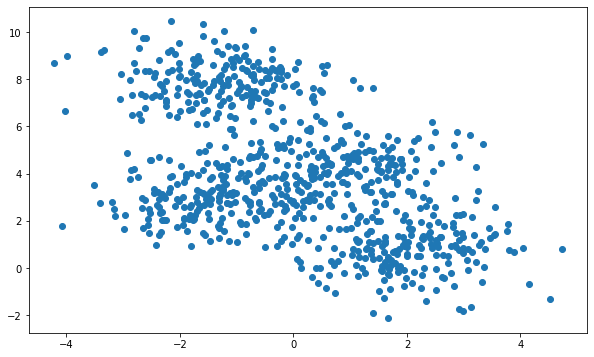

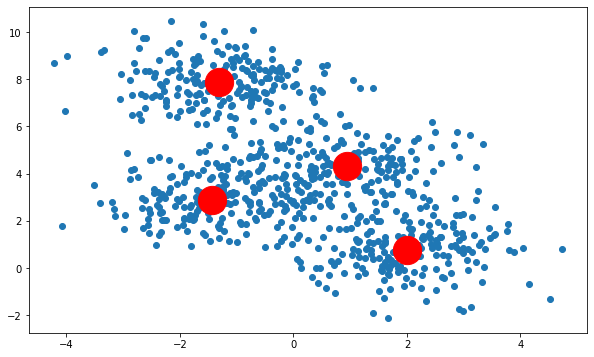

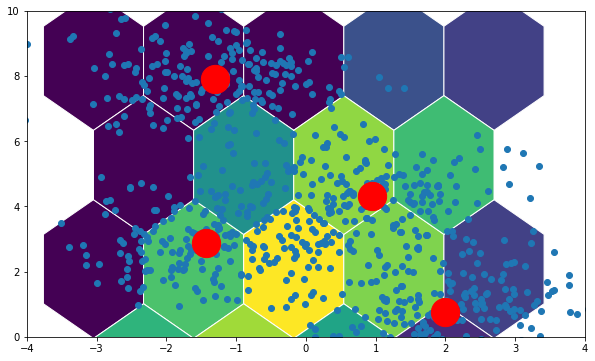

In [8]:
# plot initial code
centroids = get_centroids(cluster_std)

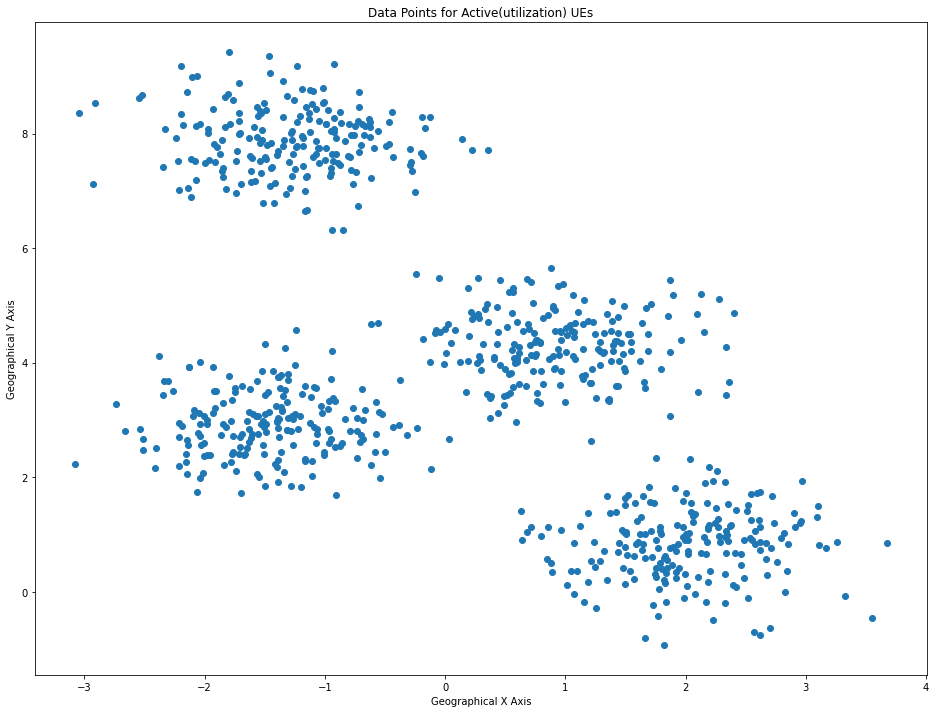

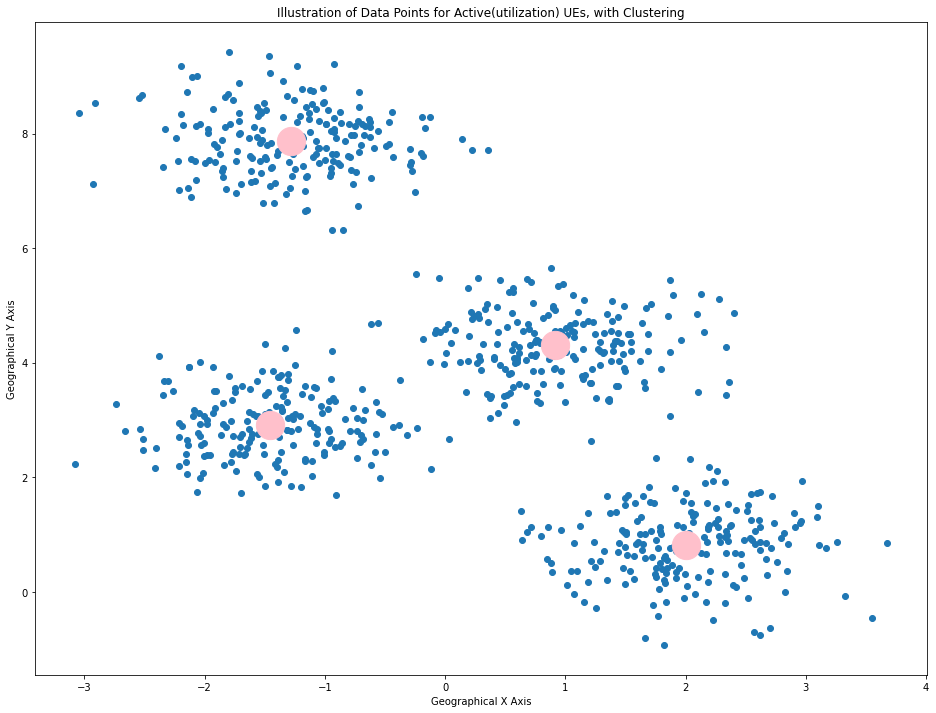

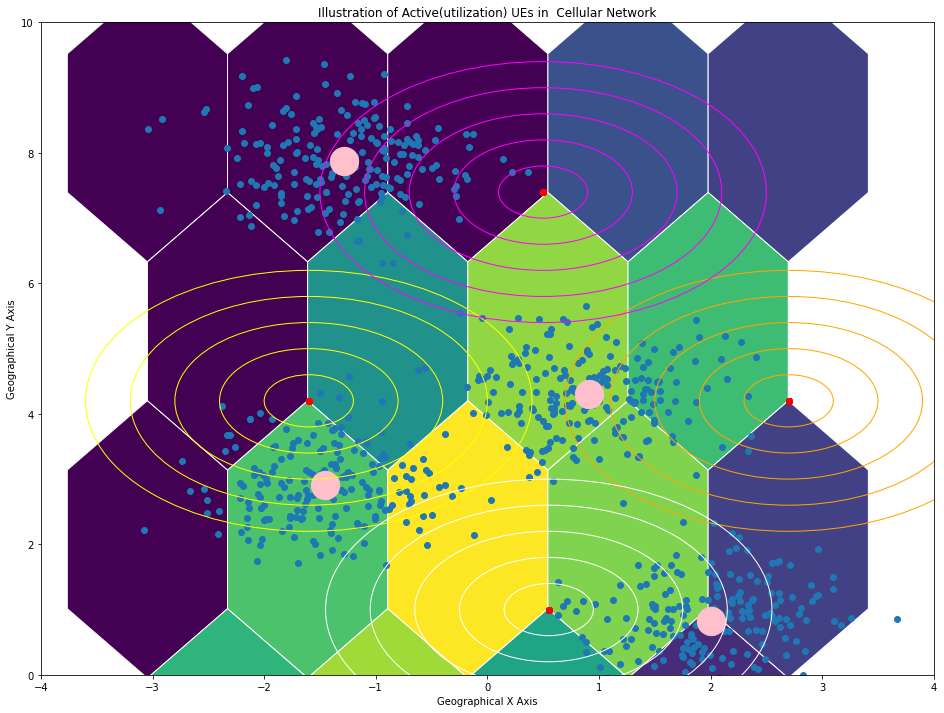

In [9]:
#parameters for the algorithm

random_state = 0
n_clusters = 4
user_elements = 800
figsize = (16,12)
cluster_std = 0.6
n_features = 2
n_init = 10
cluster_center_color = 'pink'

#intial code still
#make user elements data points using the make_blob function
#on real network, this is replaced by KPI permances on each of the TAs(Timimg Advance)
X, y = make_blobs(n_samples=user_elements, 
                  centers=n_clusters, 
                  cluster_std=cluster_std, 
                  n_features=n_features,  
                  random_state=random_state)

#plt instance to deal with plots
plt.figure(figsize=figsize)
plt.scatter(X[:,0], X[:,1])
plt.title('Data Points for Active(utilization) UEs')
plt.xlabel('Geographical X Axis')
plt.ylabel('Geographical Y Axis')

#create an instance of KMeans algorithm, un unsupervised ml to find groups in unlabeled datasets
kmeans = KMeans(n_clusters=n_clusters, 
                init='k-means++', 
                max_iter=user_elements, 
                n_init=n_init, 
                random_state=random_state)

#fit performs clustering on the input values, the X, returns the cluster labels
#predict the closest cluster on which each of the data points, thats the input X values
pred_y = kmeans.fit_predict(X)

#plt instance to deal with plots


plt.figure(figsize=figsize)  
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=user_elements, 
            c=cluster_center_color)

plt.title('Illustration of Data Points for Active(utilization) UEs, with Clustering')
plt.xlabel('Geographical X Axis')
plt.ylabel('Geographical Y Axis')
plt.show()

#plot the UEs with hexagonal grids
np.random.seed(random_state)
n = user_elements
x = np.random.standard_normal(n)
y = 2.0 + 1.5 * x + 1.5 * np.random.standard_normal(n)

fig, ax = plt.subplots(figsize=figsize)
plt.xlim([-4, 4])
plt.ylim([0, 10]) 

#create the hexagonal bins for illustrating a cellular network
hb = ax.hexbin(x, y, gridsize=4, bins='log', ec='white', lw=1.0)

plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=user_elements, c=cluster_center_color) 
 
#plot circles, represent TAs
radii = [0.4, 0.8, 1.2, 1.6, 2.0]
for radius in radii:
     
    # draw circles for BTS 1
    draw_circle = plt.Circle((-1.6, 4.2), radius, color='yellow', fill=False)
    plt.gcf().gca().add_artist(draw_circle)
    plt.plot(-1.6, 4.2, 'ro')
    
    # draw circles for BTS 2
    draw_circle = plt.Circle((2.7, 4.2), radius, color='orange', fill=False)
    plt.gcf().gca().add_artist(draw_circle)
    plt.plot(2.7, 4.2, 'ro')
             
    # draw circles for BTS 3 
    draw_circle = plt.Circle((0.5, 7.4), radius, color='magenta', fill=False)
    plt.gcf().gca().add_artist(draw_circle)
    plt.plot(0.5, 7.4, 'ro')
             
    # draw circles for BTS 4 
    draw_circle = plt.Circle((0.55, 1.0), radius, color='white', fill=False)
    plt.gcf().gca().add_artist(draw_circle)
    plt.plot(0.55, 1.0, 'ro')

#ax.set_aspect(1)
plt.title('Illustration of Active(utilization) UEs in  Cellular Network')
plt.xlabel('Geographical X Axis')
plt.ylabel('Geographical Y Axis')
plt.show()

#get the centroids after clustering
#centroids = kmeans.cluster_centers_
#centroids

In [10]:
X[:10]

array([[-2.17720837,  8.1546448 ],
       [-1.42996845,  3.85592511],
       [ 0.18672563,  4.02683656],
       [ 1.15382958, -0.16893651],
       [-1.45812508,  9.04954319],
       [ 1.05241733,  4.54498095],
       [ 1.92170411,  0.34981613],
       [ 2.51811109,  1.51532696],
       [-1.08790866,  2.87858924],
       [ 2.54287195,  1.25001929]])

In [11]:
X[0]

array([-2.17720837,  8.1546448 ])

In [12]:
y[:10]

array([ 6.76283661,  3.77894155,  3.3819027 ,  4.77451422,  6.21271341,
        1.1418893 ,  4.17221123,  1.73367583, -0.68717332,  2.44719878])

In [13]:
y[0]

6.762836614785914

In [14]:
#use equation of a circle to determine if a any point in the blob falls in TA we are targeting 
# (x - centre_x)^2 + (y - centre_y)^2 = radius^2


In [15]:
# Target cell = 7
# target TA = 4
# lets find the UEs that fall in that cell
 
    
X_TA_4 = []
y_TA_4 = []
centre = [2.7, 4.2]
centre_x = centre[0]
centre_y = centre[1]
inner_radius = 1.2
outer_radius = 1.6
square_inner_radius = math.pow(inner_radius,2)
square_outer_radius = math.pow(outer_radius,2)
start_angle = 240
end_angle = 360
centre_angle_zero_ref =  math.atan2(centre_y, centre_x)*57.2958

#loop through each of the data points generated by make_blob and find those that are in TA4
for i in range(len(X)):
    x_val = X[i]
    y_val = y[i]
    #get the differences and squares of differences for x
    x_diff = x_val[0] - centre_x
    x_square_diff = math.pow(x_diff,2)
    
    #get the differences and squares of differences for y
    y_diff = x_val[1] - centre_y
    y_square_diff = math.pow(y_diff,2) 
    
    #find the sum of the squares of differences for x and y with their centres
    x_y_square_diff_sum = x_square_diff + y_square_diff
    
    #check if point lies in sector of interest
    angle = math.atan2(x_val[1], x_val[0])
    angle_degree = angle*57.2958
    
    #final check if the point falls within TA, take it if true
    if((x_y_square_diff_sum >= square_inner_radius) and 
       (x_y_square_diff_sum <= square_outer_radius) and
       (angle_degree >= centre_angle_zero_ref) and (angle_degree <= centre_angle_zero_ref + 120)):
        
        print(x_val[1], '\t', x_val[0], '\t', angle, '\t', angle_degree, '\t', centre_angle_zero_ref) 
        X_TA_4.append(x_val)
        y_TA_4.append(y_val)
        

4.857111330388306 	 1.3447177007541433 	 1.3007059465017599 	 74.52498776957553 	 57.264794203723525
4.797889819826628 	 1.4393444092746954 	 1.2793438416852234 	 73.30102888442822 	 57.264794203723525
3.333613700861889 	 1.3603489942050504 	 1.183352148296539 	 67.80110801836884 	 57.264794203723525
4.381177073902836 	 1.4137244158530171 	 1.2586629360651187 	 72.11609985219982 	 57.264794203723525
3.858488315204525 	 1.4949317978621983 	 1.201164412063502 	 68.821675920708 	 57.264794203723525
3.892901272884202 	 1.2176750632530244 	 1.2676438942245485 	 72.63067103471089 	 57.264794203723525
4.495023919214202 	 1.5287853728149865 	 1.2429626538583567 	 71.21653962293763 	 57.264794203723525
5.084895065187389 	 1.3901609772673682 	 1.3039272580298062 	 74.70955539062417 	 57.264794203723525
4.988448447442934 	 1.491024433121897 	 1.2803532090621528 	 73.3588613957833 	 57.264794203723525
3.3425527340843413 	 1.3514089491628076 	 1.1865847323970764 	 67.98632151047642 	 57.26479420372

In [16]:
print('All Initial points : \t')
print(len(X))
print('\n')
print('Those in  TA_4 : \t')
print(len(X_TA_4))


All Initial points : 	
800


Those in  TA_4 : 	
46


In [17]:
X_TA_4

[array([1.3447177 , 4.85711133]),
 array([1.43934441, 4.79788982]),
 array([1.36034899, 3.3336137 ]),
 array([1.41372442, 4.38117707]),
 array([1.4949318 , 3.85848832]),
 array([1.21767506, 3.89290127]),
 array([1.52878537, 4.49502392]),
 array([1.39016098, 5.08489507]),
 array([1.49102443, 4.98844845]),
 array([1.35140895, 3.34255273]),
 array([1.21387411, 3.64795042]),
 array([1.288909  , 3.95831455]),
 array([1.19008992, 4.72773123]),
 array([1.37609993, 4.02735546]),
 array([1.27251514, 4.23412496]),
 array([1.42458308, 3.59042035]),
 array([1.65991049, 3.56289184]),
 array([1.87296081, 3.06179631]),
 array([1.48124884, 4.15411218]),
 array([1.39534437, 4.30604986]),
 array([1.86922139, 5.44132083]),
 array([1.44022186, 3.59345894]),
 array([1.37964693, 4.54826443]),
 array([1.14422484, 4.24489709]),
 array([1.29023607, 4.20085953]),
 array([1.24258802, 4.50399192]),
 array([1.89593761, 5.18540259]),
 array([1.71444449, 5.02521524]),
 array([1.43626799, 4.51756302]),
 array([1.3233

In [18]:
y_TA_4

[-1.84620314151388,
 4.403051506442313,
 8.12696546365449,
 0.24561161267928777,
 2.722585374077102,
 -0.6070958938899635,
 2.7883356842701037,
 0.42446243176858955,
 1.9969356043906468,
 4.384530119967954,
 1.0441676728098468,
 3.016017157642764,
 7.79377028654055,
 2.157140256736331,
 1.9601425209492092,
 5.505366403380615,
 -1.3395359036827614,
 0.8895356749842478,
 -0.5889159083255571,
 -1.5778567968163015,
 1.1769076544091646,
 2.033856608755916,
 4.699859685782115,
 1.9743644835459015,
 3.9103682458361506,
 0.7118128896295064,
 1.4420074765545392,
 0.04310281152563,
 -0.8945391939730392,
 3.462664414259664,
 5.034308486442786,
 1.415356063276479,
 2.6410559981281576,
 2.1184304592533847,
 1.9026917079726784,
 1.492818309629806,
 3.9395217497170134,
 3.366103007151853,
 3.8404683270924544,
 2.340619482074772,
 1.236540971830951,
 2.1024990033456974,
 -3.105287250333147,
 3.605313786585991,
 5.426609752919146,
 -1.7883297014796649]

C:\Users\humph\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


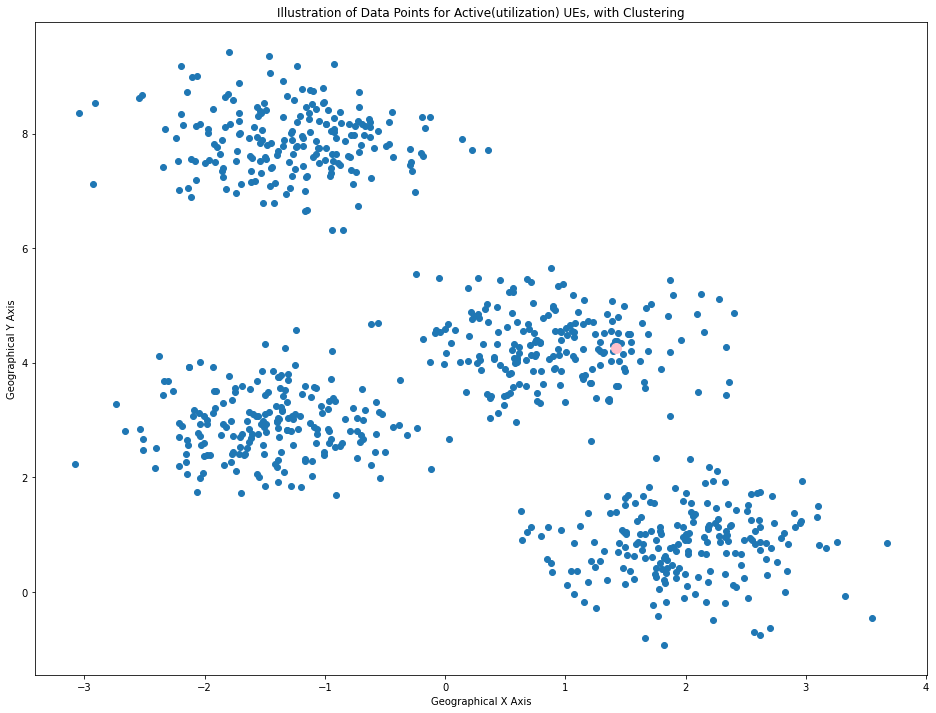

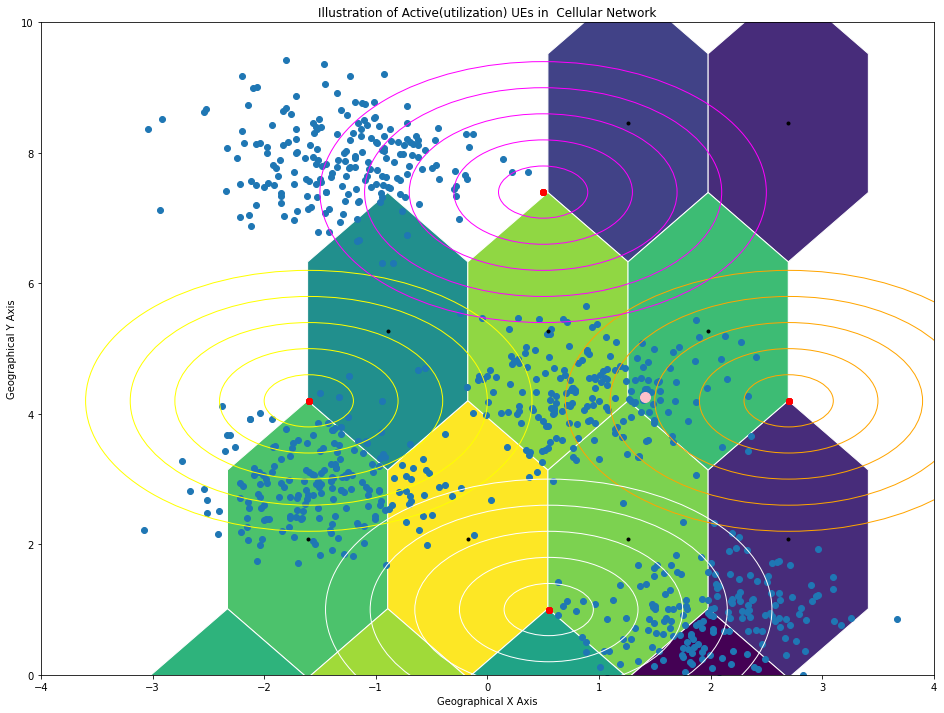

array([[1.41694101, 4.25707003]])

In [21]:
#paramters 
user_elements = len(X_TA_4)
n_clusters = 1
random_state = 0  
figsize = (16,12)
cluster_std = 0.6
n_features = 2
n_init = 10
cluster_center_color = 'pink'
s = 100 # marker size

#create an instance of KMeans algorithm, un unsupervised ml to find groups in unlabeled datasets
kmeans = KMeans(n_clusters=n_clusters, 
                init='k-means++', 
                max_iter=user_elements, 
                n_init=n_init, 
                random_state=random_state)

#fit performs clustering on the input values, the X, returns the cluster labels
#predict the closest cluster on which each of the data points, thats the input X values
pred_y = kmeans.fit_predict(X_TA_4)

#plt instance to deal with plots

plt.figure(figsize=figsize)  
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=s, 
            c=cluster_center_color)

plt.title('Illustration of Data Points for Active(utilization) UEs, with Clustering')
plt.xlabel('Geographical X Axis')
plt.ylabel('Geographical Y Axis')
plt.show() 

#plot the UEs with hexagonal grids
np.random.seed(random_state)
n = len(X)
x = np.random.standard_normal(n)
y = 2.0 + 1.5 * x + 1.5 * np.random.standard_normal(n)

fig, ax = plt.subplots(figsize=figsize)
plt.xlim([-4, 4])
plt.ylim([0, 10]) 

#create the hexagonal bins for illustrating a cellular network
hb = ax.hexbin(x, y, gridsize=4, bins='log', mincnt=1, ec='white', lw=1.0)            
counts = hb.get_array()
ncnts = np.count_nonzero(np.power(10,counts))
verts = hb.get_offsets()

hb_centres = []
#plot the centres for the hex bins
for offc in range(verts.shape[0]):
    binx,biny = verts[offc][0],verts[offc][1]
    if counts[offc]:
        hb_centres.append([[binx],[biny]])
        plt.plot(binx, biny,'k.', zorder=100) 
        
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=s, c=cluster_center_color) 
 
#plot circles, represent TAs
radii = [0.4, 0.8, 1.2, 1.6, 2.0]
for radius in radii:
     
    # draw circles for BTS 1
    draw_circle = plt.Circle((-1.6, 4.2), radius, color='yellow', fill=False)
    plt.gcf().gca().add_artist(draw_circle)
    plt.plot(-1.6, 4.2, 'ro')
    
    # draw circles for BTS 2
    draw_circle = plt.Circle((2.7, 4.2), radius, color='orange', fill=False)
    plt.gcf().gca().add_artist(draw_circle)
    plt.plot(2.7, 4.2, 'ro')
             
    # draw circles for BTS 3 
    draw_circle = plt.Circle((0.5, 7.4), radius, color='magenta', fill=False)
    plt.gcf().gca().add_artist(draw_circle)
    plt.plot(0.5, 7.4, 'ro')
             
    # draw circles for BTS 4 
    draw_circle = plt.Circle((0.55, 1.0), radius, color='white', fill=False)
    plt.gcf().gca().add_artist(draw_circle)
    plt.plot(0.55, 1.0, 'ro')

#ax.set_aspect(1)
plt.title('Illustration of Active(utilization) UEs in  Cellular Network')
plt.xlabel('Geographical X Axis')
plt.ylabel('Geographical Y Axis')
plt.show()

#get the centroids after clustering
centroids = kmeans.cluster_centers_
centroids

In [22]:
hb_centres

[[[-3.0461430605422937], [-4.303876022668147]],
 [[-1.6105512808302336], [-4.303876022668147]],
 [[-1.6105512808302336], [2.076621645050154]],
 [[-0.1749595011181735], [-4.303876022668147]],
 [[-0.1749595011181735], [2.076621645050154]],
 [[1.2606322785938868], [2.076621645050154]],
 [[1.2606322785938868], [8.457119312768455]],
 [[2.6962240583059467], [2.076621645050154]],
 [[2.6962240583059467], [8.457119312768455]],
 [[-2.3283471706862637], [-1.1136271888089966]],
 [[-0.8927553909742034], [-1.1136271888089966]],
 [[-0.8927553909742034], [5.266870478909304]],
 [[0.5428363887378564], [-1.1136271888089966]],
 [[0.5428363887378564], [5.266870478909304]],
 [[1.9784281684499163], [-1.1136271888089966]],
 [[1.9784281684499163], [5.266870478909304]]]

In [24]:
target_hb_centre = hb_centres[15]
target_hb_centre

[[1.9784281684499163], [5.266870478909304]]